Saving 3. Predict Disease Outcome Based on Genetic and Clinical Data.csv to 3. Predict Disease Outcome Based on Genetic and Clinical Data (6).csv
Dataset shape: (569, 32)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          

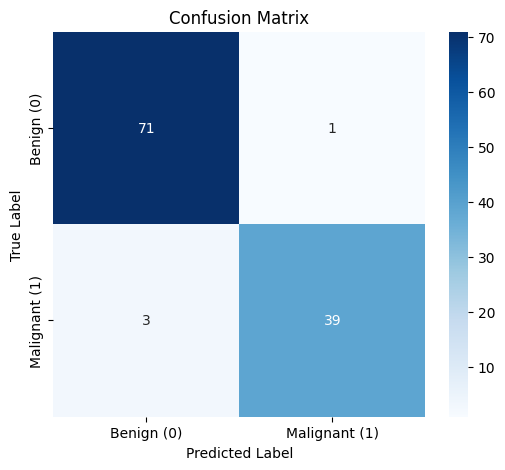


Silhouette Score for KMeans clustering (k=2): 0.3447


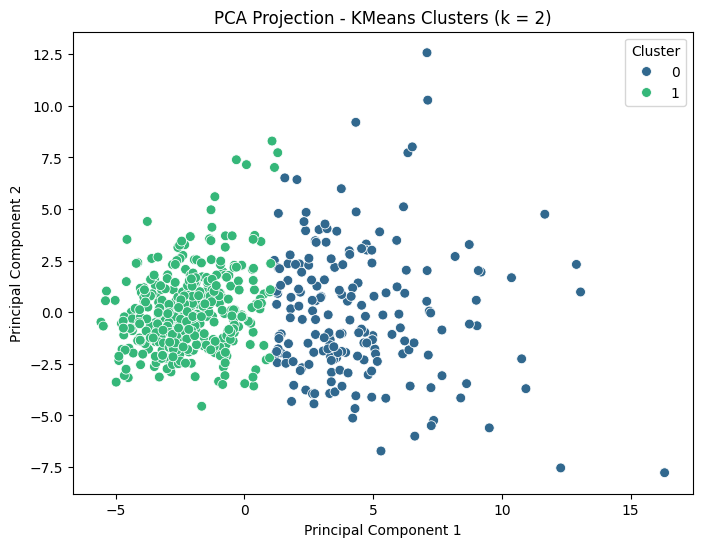

In [7]:
# Step 1. Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For classification and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, accuracy_score,
                             precision_score, recall_score, f1_score, classification_report)

# For preprocessing and imputation
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# For clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 2. Upload the CSV file
from google.colab import files
uploaded = files.upload()

# Step 3. Load the dataset
df = pd.read_csv("3. Predict Disease Outcome Based on Genetic and Clinical Data.csv")

# Remove any unnamed columns to avoid errors
df = df.loc[:, ~df.columns.str.contains("Unnamed")]

print("Dataset shape:", df.shape)
print(df.head())

# Check for missing values
print("\nMissing values in dataset:")
print(df.isna().sum())

# Step 4. Data Preprocessing for Classification

# Drop identifier column if present
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)

# Convert 'diagnosis' column to numeric (M=1, B=0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Separate features and target
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

# Step 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y)

# Step 6. Handle Missing Values
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed  = imputer.transform(X_test)

# Step 7. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Step 8. Classification using Logistic Regression
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

# Step 9. Evaluate Classification Model
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)  # F1 Score added

# Print metrics
print("\nClassification Metrics:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Benign", "Malignant"]))

# Confusion Matrix Visualization
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Benign (0)", "Malignant (1)"],
            yticklabels=["Benign (0)", "Malignant (1)"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# --- Unsupervised Clustering & Segmentation Section ---

# Step 10. Handle Missing Values for Clustering
X_features = df.drop("diagnosis", axis=1)
imputer_all = SimpleImputer(strategy='median')
X_features_imputed = imputer_all.fit_transform(X_features)

# Step 11. Scale Features
scaler_all = StandardScaler()
X_scaled_all = scaler_all.fit_transform(X_features_imputed)

# Step 12. Apply K-Means Clustering
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled_all)

# Compute Silhouette Score
sil_score = silhouette_score(X_scaled_all, clusters)
print("\nSilhouette Score for KMeans clustering (k={}): {:.4f}".format(k, sil_score))

# Step 13. Visualize Clustering Results using PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled_all)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="viridis", s=50)
plt.title("PCA Projection - KMeans Clusters (k = {})".format(k))
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()
